In [1]:
import networkx as nx
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from cdlib import algorithms
import random

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'graph_tool', 'bayanpy', 'wurlitzer'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [2]:
# GRAPH CLUSTERING ILLUSTRATION
sizes = [11, 12, 14]
probs = [
    [0.95, 0.07, 0.05],  # Cluster 1
    [0.07, 0.95, 0.05],  # Cluster 2
    [0.05, 0.05, 0.95]  # Cluster 3
]
G = nx.stochastic_block_model(sizes, probs, seed=0)

pos = nx.spring_layout(G)

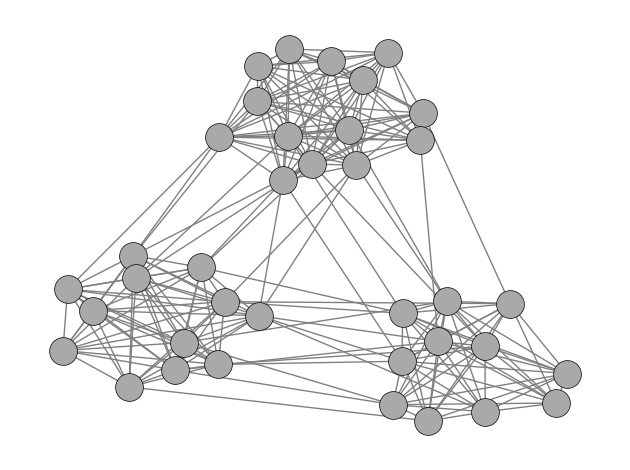

In [3]:
nodes = nx.draw_networkx_nodes(G, pos, node_color='darkgray', node_size=400)
nodes.set_edgecolor('black')
nodes.set_linewidth(.5)
nx.draw_networkx_edges(G, pos, edge_color='gray')
plt.tight_layout()
plt.axis("off")
plt.savefig("figures/clusters_before.png", transparent=True, dpi=300)

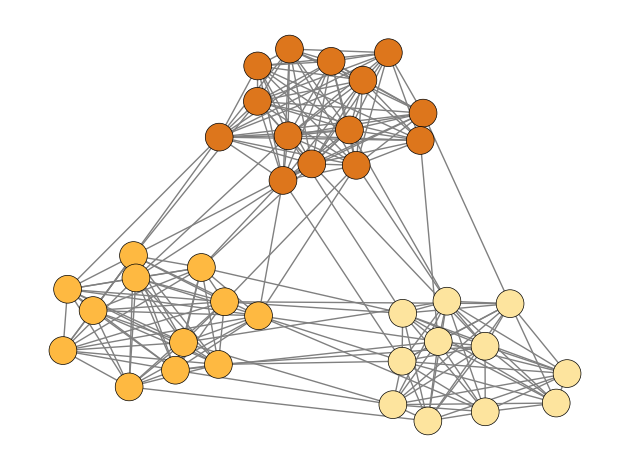

In [4]:
cmap0 = ['#FDE49E' for i in range(11)]
cmap1 = ['#FEB941' for i in range(12)]
cmap2 = ['#DD761C' for i in range(14)]
cmap = cmap0 + cmap1 + cmap2
nodes = nx.draw_networkx_nodes(G, pos, node_color=cmap, node_size=400)
nodes.set_edgecolor('black')
nodes.set_linewidth(.5)
nx.draw_networkx_edges(G, pos, edge_color='gray')
plt.tight_layout()
plt.axis("off")
plt.savefig("figures/clusters_after.png", transparent=True, dpi=300)

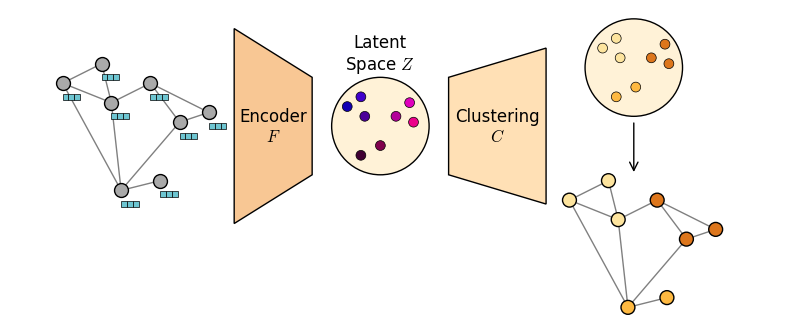

In [5]:
# DEEP GRAPH CLUSTERING FRAMEWORK
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111, aspect="equal")

ax.set_xlim(-.15, 3.8)
ax.set_ylim(-.5, 1.1)
g = nx.Graph()
g.add_edges_from([
    (0, 1), (1, 2), (0, 2), (0, 3), (1, 3), (3, 4), (3, 5), (5, 6), (6, 7), (5, 7), (7, 1)
])
colors_by_clusters = ['#FDE49E'] * 3 + ['#FEB941'] * 2 + ['#DD761C'] * 3

pos = {
    0: (.2, 1),
    1: (.45, .9),
    2: (.4, 1.1),
    3: (.5, .45),
    4: (.7, .5),
    5: (.8, .8),
    6: (.95, .85),
    7: (.65, 1)
}
pos = {k : (v[0] - .08, v[1] - .28) for k, v in pos.items()}

nodes = nx.draw_networkx_nodes(g, pos, node_color="darkgray", node_size=100)
nodes.set_edgecolor('black')
nx.draw_networkx_edges(g, pos, edge_color='gray')
encoder = patches.Polygon([[1, 1], [1, 0], [1.4, .25], [1.4, .75]], closed=True, edgecolor='black', facecolor='#F8C794', linewidth=1)
plt.text(1.2, .5, "Encoder\n$F$", fontsize=12, ha='center', va='center', math_fontfamily="cm")
ax.add_patch(encoder)

latent_space = patches.Circle((1.75, .5), .25, edgecolor='black', facecolor='#FFF2D7', linewidth=1)
latent_pos = {0: (1.58, .6), 1: (1.65, .65), 2: (1.67, .55), 3: (1.65, .35), 4: (1.75, .4), 5: (1.9, .62), 6: (1.92, .52), 7: (1.83, .55)}
latent_color = [
    (.5 + 2.5 * (p[0] - 1.75), 0, .5 + 2 * (p[1] - .5)) for p in latent_pos.values()
]
encoded_nodes = nx.draw_networkx_nodes(g, latent_pos, node_color=latent_color, node_size=50) 
encoded_nodes.set_edgecolor('black')
encoded_nodes.set_linewidth(.5)
plt.text(1.75, .87, "Latent\nSpace $Z$", fontsize=12, ha='center', va='center', math_fontfamily="cm")
ax.add_patch(latent_space)

clustering = patches.Polygon([[2.1, .75], [2.1, .25], [2.6, .1], [2.6, .9]], closed=True, edgecolor='black', facecolor='#FFE0B5', linewidth=1)
plt.text(2.35, .5, "Clustering\n$C$", fontsize=12, ha='center', va='center', math_fontfamily="cm")
ax.add_patch(clustering)

clustered_latent = patches.Circle((3.05, .8), .25, edgecolor='black', facecolor='#FFF2D7', linewidth=1)
ax.add_patch(clustered_latent)
latent_pos = {k: (v[0] + 1.31, v[1] + .3) for k, v in latent_pos.items()}
encoded_nodes = nx.draw_networkx_nodes(g, latent_pos, node_color=colors_by_clusters, node_size=50)
encoded_nodes.set_edgecolor('black')
encoded_nodes.set_linewidth(.5)

arrow = patches.FancyArrowPatch((3.05, .53), (3.05, .25), arrowstyle='->', mutation_scale=15, color='black')
ax.add_patch(arrow)

# node features
for i in range(8):
    for j in range(3):
        ax.add_patch(patches.Rectangle((pos[i][0] - .0 + .03 * j, pos[i][1] - .085), .03, .03, edgecolor='black', facecolor="#6DC5D1", linewidth=.5))
    
pos = {k: (v[0] + 2.6, v[1] - .6) for k, v in pos.items()}
nodes = nx.draw_networkx_nodes(g, pos, node_color=colors_by_clusters, node_size=100)
nodes.set_edgecolor('black')
nx.draw_networkx_edges(g, pos, edge_color='gray')

plt.tight_layout()
plt.axis("off")
plt.savefig("figures/deep_framework.png", transparent=True, dpi=300)

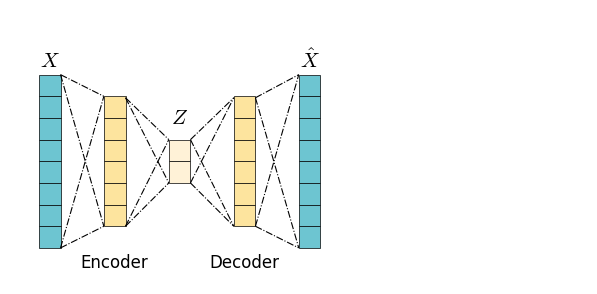

In [6]:
# AUTOENCODERS

fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121, aspect="equal")
ax.set_xlim(-.2, 3.8)
ax.set_ylim(-.8, 1.1)

input_vector_colors = ["#6DC5D1" for i in range(8)]

neuron_width = .15
layer_width = .3
tot_width = neuron_width + layer_width

#  input vector
for i in range(8):
    ax.add_patch(patches.Rectangle((0, .5 - .15 * i), .15, .15, edgecolor='black', facecolor=input_vector_colors[i], linewidth=.5))
plt.text(.075, .75, "$X$", fontsize=15, ha='center', va='center', math_fontfamily="cm")
    
# links
plt.plot([neuron_width, tot_width], [.65, .5], color='black', linestyle='-.', linewidth=.8)
plt.plot([neuron_width, tot_width], [-.55, -.4], color='black', linestyle='-.', linewidth=.8)
plt.plot([neuron_width, tot_width], [.65, -.4], color='black', linestyle='-.', linewidth=.8)
plt.plot([neuron_width, tot_width], [-.55, .5], color='black', linestyle='-.', linewidth=.8)

# first layer
for i in range(6):
    ax.add_patch(patches.Rectangle((tot_width, .35 - .15 * i), .15, .15, edgecolor='black', facecolor="#FDE49E", linewidth=.5))
    


plt.plot([tot_width + neuron_width, 2 * tot_width], [.49, .2], color='black', linestyle='-.', linewidth=.8)
plt.plot([tot_width + neuron_width, 2 * tot_width], [-.4, -.1], color='black', linestyle='-.', linewidth=.8)
plt.plot([tot_width + neuron_width, 2 * tot_width], [.49, -.1], color='black', linestyle='-.', linewidth=.8)
plt.plot([tot_width + neuron_width, 2 * tot_width], [-.4, .2], color='black', linestyle='-.', linewidth=.8)

# latent space
for i in range(2):
    ax.add_patch(patches.Rectangle((tot_width * 2, .05 - .15 * i), .15, .15, edgecolor='black', facecolor="#FFF2D7", linewidth=.5))
plt.text(2 * tot_width + neuron_width / 2, .35, "$Z$", fontsize=15, ha='center', va='center', math_fontfamily="cm")
    
plt.plot([2 * tot_width + neuron_width, 3 * tot_width], [.2, .49], color='black', linestyle='-.', linewidth=.8)
plt.plot([2 * tot_width + neuron_width, 3 * tot_width], [-.1, -.4], color='black', linestyle='-.', linewidth=.8)
plt.plot([2 * tot_width + neuron_width, 3 * tot_width], [.2, -.4], color='black', linestyle='-.', linewidth=.8)
plt.plot([2 * tot_width + neuron_width, 3 * tot_width], [-.1, .49], color='black', linestyle='-.', linewidth=.8)

# second layer
for i in range(6):
    ax.add_patch(patches.Rectangle((tot_width * 3, .35 - .15 * i), .15, .15, edgecolor='black', facecolor="#FDE49E", linewidth=.5))
    
#links
plt.plot([3 * tot_width + neuron_width, 4 * tot_width], [.49, .65], color='black', linestyle='-.', linewidth=.8)
plt.plot([3 * tot_width + neuron_width, 4 * tot_width], [-.4, -.55], color='black', linestyle='-.', linewidth=.8)
plt.plot([3 * tot_width + neuron_width, 4 * tot_width], [.49, -.55], color='black', linestyle='-.', linewidth=.8)
plt.plot([3 * tot_width + neuron_width, 4 * tot_width], [-.4, .65], color='black', linestyle='-.', linewidth=.8)

# output vector
for i in range(8):
    ax.add_patch(patches.Rectangle((4 * tot_width, .5 - .15 * i), .15, .15, edgecolor='black', facecolor=input_vector_colors[i], linewidth=.5))
    
plt.text(4 * tot_width + neuron_width / 2, .75, "$\hat{X}$", fontsize=15, ha='center', va='center', math_fontfamily="cm")
plt.text(tot_width + neuron_width / 2, -.65, "Encoder", fontsize=12, ha='center', va='center', math_fontfamily="cm")
plt.text(3 * tot_width + neuron_width / 2, -.65, "Decoder", fontsize=12, ha='center', va='center', math_fontfamily="cm")

plt.axis("off")
plt.tight_layout()
plt.savefig("figures/autoencoder.png", transparent=True, dpi=300)

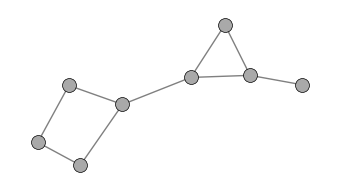

In [515]:
# random small graph
fig = plt.figure(figsize=(3.5, 2))
G = nx.erdos_renyi_graph(8, .47, seed=0)

pos = nx.spring_layout(G, k=.2)
nodes = nx.draw_networkx_nodes(G, pos, node_color='darkgray', node_size=100)
nodes.set_edgecolor('black')
nodes.set_linewidth(.5)
nx.draw_networkx_edges(G, pos, edge_color='gray')
plt.tight_layout()
plt.axis("off")
plt.savefig("figures/small_graph.png", transparent=True, dpi=300)

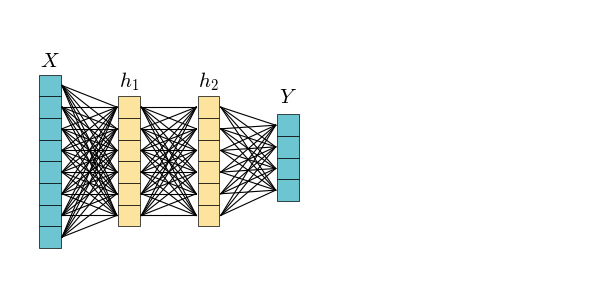

In [8]:
# NEURAL NETWORK

fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121, aspect="equal")

ax.set_xlim(-.2, 3.8)
ax.set_ylim(-.8, 1.1)

input_vector_colors = ["#6DC5D1" for i in range(8)]

neuron_width = .15
layer_width = .4
tot_width = neuron_width + layer_width

#  input vector
for i in range(8):
    ax.add_patch(patches.Rectangle((0, .5 - .15 * i), .15, .15, edgecolor='black', facecolor=input_vector_colors[i], linewidth=.5))
    
plt.text(.075, .75, "$X$", fontsize=15, ha='center', va='center', math_fontfamily="cm")

# links
for i in range(6):
    for j in range(8):
        plt.plot([neuron_width + .01, tot_width - .01], [.575 - .15 * j, .425 - .15 * i], color='black', linestyle='-', linewidth=.8)
        
# first layer
for i in range(6):
    ax.add_patch(patches.Rectangle((tot_width, .35 - .15 * i), .15, .15, edgecolor='black', facecolor="#FDE49E", linewidth=.5))
    
plt.text(tot_width + neuron_width / 2, .6, "$h_1$", fontsize=15, ha='center', va='center', math_fontfamily="cm")

# links
for i in range(6):
    for j in range(6):
        plt.plot([tot_width + neuron_width + .01, 2 * tot_width - .01], [.425 - .15 * i, .425 - .15 * j], color='black', linestyle='-', linewidth=.8)
        
# second layer

for i in range(6):
    ax.add_patch(patches.Rectangle((tot_width * 2, .35 - .15 * i), .15, .15, edgecolor='black', facecolor="#FDE49E", linewidth=.5))
    
plt.text(2 * tot_width + neuron_width / 2, .6, "$h_2$", fontsize=15, ha='center', va='center', math_fontfamily="cm")

# links
for i in range(6):
    for j in range(4):
        plt.plot([2 * tot_width + neuron_width + .01, 3 * tot_width - .01], [.425 - .15 * i, .3 - .15 * j], color='black', linestyle='-', linewidth=.8)
        
# output vector
for i in range(4):
    ax.add_patch(patches.Rectangle((3 * tot_width, .225 - .15 * i), .15, .15, edgecolor='black', facecolor=input_vector_colors[i], linewidth=.5))
    
plt.text(3 * tot_width + neuron_width / 2, .5, "$Y$", fontsize=15, ha='center', va='center', math_fontfamily="cm")

plt.axis("off")
plt.tight_layout()
plt.savefig("figures/neural_network.png", transparent=True, dpi=300)

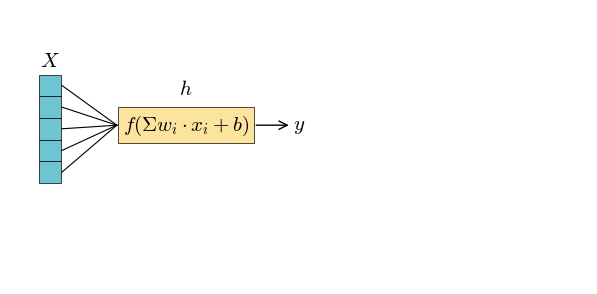

In [9]:
# single neuron

fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(121, aspect="equal")

ax.set_xlim(-.2, 3.8)
ax.set_ylim(-.8, 1.1)

input_vector_colors = ["#6DC5D1" for i in range(8)]

neuron_width = .15
layer_width = .4
tot_width = neuron_width + layer_width

#  input vector

for i in range(5):
    ax.add_patch(patches.Rectangle((0, .5 - .15 * i), .15, .15, edgecolor='black', facecolor=input_vector_colors[i], linewidth=.5))
    
plt.text(.075, .75, "$X$", fontsize=15, ha='center', va='center', math_fontfamily="cm")
    
# links

for i in range(5):
    plt.plot([neuron_width + .01, tot_width - .01], [.575 - .15 * i, .3], color='black', linestyle='-', linewidth=.8)
    
# single neuron

ax.add_patch(patches.Rectangle((tot_width, .175), .94, .25, edgecolor='black', facecolor="#FDE49E", linewidth=.5))

plt.text(tot_width + .47, .55, "$h$", fontsize=15, ha='center', va='center', math_fontfamily="cm")
# linear operation
plt.text(tot_width + .47, .3, "$f(\\Sigma w_i\\cdot x_i + b)$", fontsize=15, ha='center', va='center', math_fontfamily="cm")

ax.add_patch(patches.FancyArrowPatch((tot_width + .936, .3), (tot_width + 1.2, .3), arrowstyle='->', mutation_scale=15, color='black'))
plt.text(tot_width + 1.25, .3, "$y$", fontsize=15, ha='center', va='center', math_fontfamily="cm")

plt.axis("off")
plt.tight_layout()
plt.savefig("figures/neuron.png", transparent=True, dpi=300)

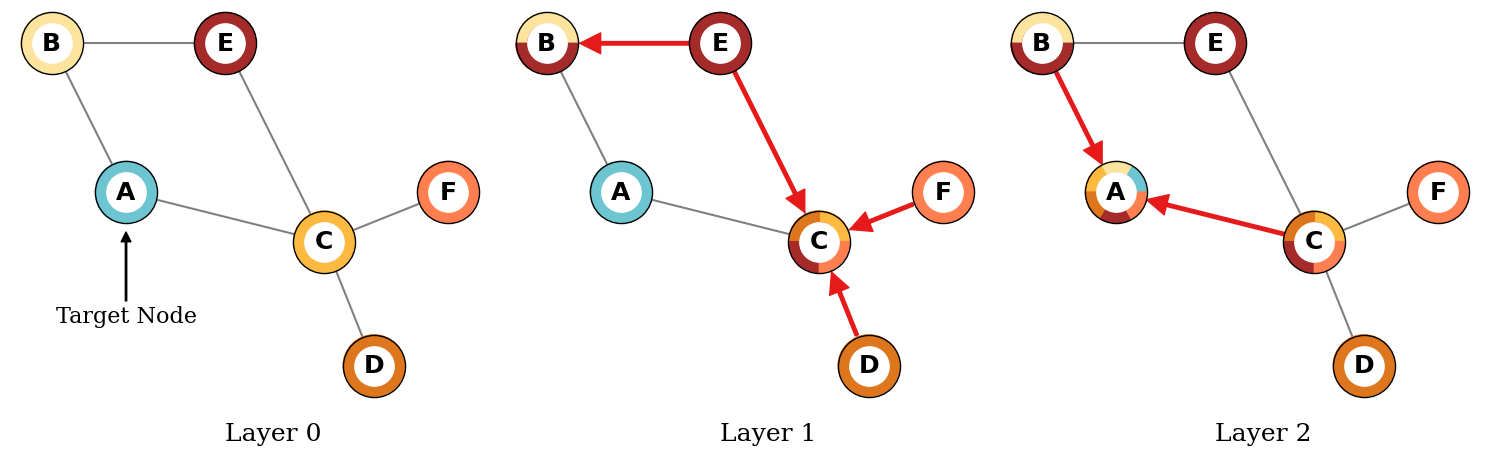

In [528]:
# graph convolutional network

def draw_pie_nodes(ax, pos, node_colors, node_size):
    for node, (x, y) in pos.items():
        colors = node_colors[node]
        angle = 360 / len(colors)
        wedges = [
            patches.Wedge(center=(x, y), r=node_size / (470 *3.6), theta1=i * angle, theta2=(i + 1) * angle, color=colors[i], width=.2)
            for i in range(len(colors))
        ]
        for wedge in wedges:
            ax.add_patch(wedge)

def get_frac_coord(A, B, c):
    return A + c * (B - A)

arrow_style = "Simple, tail_width=2.5, head_width=15, head_length=15"
def arrow(ax, A, B, style=arrow_style, color=(.9, .1, .1)):
    ax.add_patch(patches.FancyArrowPatch(A, B, arrowstyle=style, color=color))
        

g = nx.Graph()
g.add_edges_from([
    ('B', 'A'), ('C', 'A'), ('D', 'C'), ('E', 'B'), ('E', 'C'), ('F', 'C')
])
pos = {
    'A': np.array([-.6, 0]),
    'B': np.array([-.9, .6]),
    'C': np.array([.2, -.2]),
    'D': np.array([.4, -.7]),
    'E': np.array([-.2, .6]),
    'F': np.array([.7, 0])
}

fig = plt.figure(figsize=(15, 5))

if True:
    ax = fig.add_subplot(131, aspect="equal")
    node_colors = {
        'A': ['#6DC5D1'],
        'B': ['#FDE49E'],
        'C': ['#FEB941'],
        'D': ['#DD761C'],
        'E': ['#A52A2A'],
        'F': ['#FF7F50']
    }
    nodes = nx.draw_networkx_nodes(g, pos=pos, node_color=(1,1,1,0), node_size=2000)
    nodes.set_edgecolor('black')
    nx.draw_networkx_nodes(g, pos=pos, node_color='white', node_size=800)
    nx.draw_networkx_labels(g, pos=pos, font_size=18, font_weight='bold', font_color='black', font_family="sans-serif")
    nx.draw_networkx_edges(g, pos=pos, edge_color='gray', width=1.5, node_size=2000, arrowsize=15)
    draw_pie_nodes(ax, pos, node_colors, node_size=210)
    text_pos = np.array([-.6, -.5])
    plt.text(text_pos[0], text_pos[1], "Target Node", ha='center', va='center', fontsize=16,  fontfamily="serif")
    arrow(ax, get_frac_coord(pos['A'], text_pos, .9), get_frac_coord(pos['A'], text_pos, .3), color='black', style="Simple, head_length=7, head_width=7, tail_width=1")
    plt.axis("off")
    plt.tight_layout()
    plt.text(-.2, -1, "Layer 0", fontsize=18, fontfamily="serif")

if True:
    ax = fig.add_subplot(132, aspect="equal")
    
    node_colors = {
        'A': ['#6DC5D1'],
        'B': ['#FDE49E', '#A52A2A'],
        'C': ['#FEB941', '#DD761C', '#A52A2A', '#FF7F50'],
        'D': ['#DD761C'],
        'E': ['#A52A2A'],
        'F': ['#FF7F50']
    }
    nodes = nx.draw_networkx_nodes(g, pos=pos, node_color=(1,1,1,0), node_size=2000)
    nodes.set_edgecolor('black')
    nx.draw_networkx_nodes(g, pos=pos, node_color='white', node_size=800)
    nx.draw_networkx_labels(g, pos=pos, font_size=18, font_weight='bold', font_color='black', font_family="sans-serif")
    nx.draw_networkx_edges(g, pos=pos, edge_color='gray', width=1.5, node_size=2000, arrowsize=15)
    draw_pie_nodes(ax, pos, node_colors, node_size=210)
    plt.axis("off")
    plt.tight_layout()
    arrow(ax, get_frac_coord(pos['B'], pos['E'], .84), get_frac_coord(pos['B'], pos['E'], .175))
    arrow(ax, get_frac_coord(pos['C'], pos['E'], .87), get_frac_coord(pos['C'], pos['E'], .135))
    arrow(ax, get_frac_coord(pos['C'], pos['F'], .775), get_frac_coord(pos['C'], pos['F'], .225))
    arrow(ax, get_frac_coord(pos['C'], pos['D'], .775), get_frac_coord(pos['C'], pos['D'], .225))
    plt.text(-.2, -1, "Layer 1", fontsize=18, fontfamily="serif")

if True:
    ax = fig.add_subplot(133, aspect="equal")
    
    node_colors = {
        'A': ['#6DC5D1', '#FDE49E', '#FEB941', '#DD761C', '#A52A2A', '#FF7F50'],
        'B': ['#FDE49E', '#A52A2A'],
        'C': ['#FEB941', '#DD761C', '#A52A2A', '#FF7F50'],
        'D': ['#DD761C'],
        'E': ['#A52A2A'],
        'F': ['#FF7F50']
    }
    nodes = nx.draw_networkx_nodes(g, pos=pos, node_color=(1,1,1,0), node_size=2000)
    nodes.set_edgecolor('black')
    nx.draw_networkx_nodes(g, pos=pos, node_color='white', node_size=800)
    nx.draw_networkx_labels(g, pos=pos, font_size=18, font_weight='bold', font_color='black', font_family="sans-serif")
    nx.draw_networkx_edges(g, pos=pos, edge_color='gray', width=1.5, node_size=2000, arrowsize=15)
    draw_pie_nodes(ax, pos, node_colors, node_size=210)
    plt.axis("off")
    plt.tight_layout()
    arrow(ax, get_frac_coord(pos['A'], pos['B'], .82), get_frac_coord(pos['A'], pos['B'], .17))
    arrow(ax, get_frac_coord(pos['A'], pos['C'], .86), get_frac_coord(pos['A'], pos['C'], .14))
    
    plt.text(-.2, -1, "Layer 2", fontsize=18, fontfamily="serif")

plt.savefig("figures/gcn_graph.png", transparent=True, dpi=300)

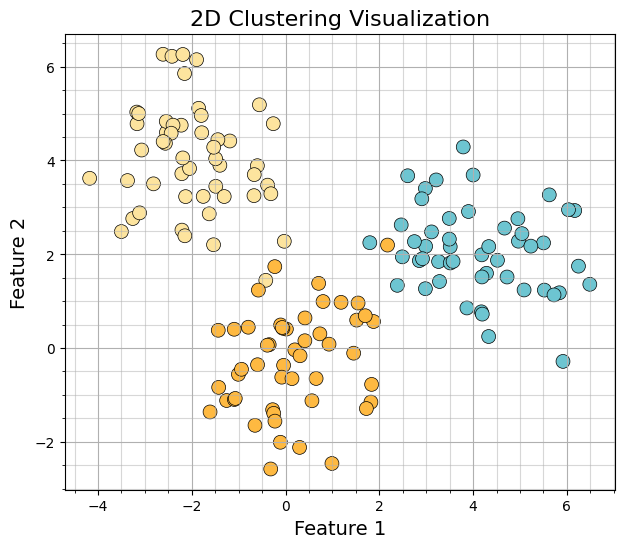

In [11]:

# Create the figure and adjust size
fig = plt.figure(figsize=(12, 6))

# Generate synthetic data
data = np.random.normal(0, 1, (150, 2))
data[:50, 0] += 4
data[:50, 1] += 2
data[50:100, 0] -= 2
data[50:100, 1] += 4

# Define colors for clusters
colors = ["#6DC5D1"] * 50 + ["#FDE49E"] * 50 + ["#FEB941"] * 50

# Create scatter plot
ax = fig.add_subplot(121, aspect="equal")
scatter = ax.scatter(data[:, 0], data[:, 1], c=colors, s=100, edgecolor='black', linewidth=0.5)

# Adding titles and labels
ax.set_title('2D Clustering Visualization', fontsize=16)
ax.set_xlabel('Feature 1', fontsize=14)
ax.set_ylabel('Feature 2', fontsize=14)

# Create legend
# from matplotlib.lines import Line2D
# legend_elements = [
#     Line2D([0], [0], marker='o', color='w', label='Cluster 1', markersize=10, markerfacecolor='#6DC5D1', markeredgecolor='black'),
#     Line2D([0], [0], marker='o', color='w', label='Cluster 2', markersize=10, markerfacecolor='#FDE49E', markeredgecolor='black'),
#     Line2D([0], [0], marker='o', color='w', label='Cluster 3', markersize=10, markerfacecolor='#FEB941', markeredgecolor='black')
# ]
# ax.legend(handles=legend_elements, loc='upper right', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.grid()
# enable minor axis and alpha=.5 grid
plt.grid(which='minor', alpha=0.5)
plt.minorticks_on()

# Save the figure
plt.savefig("figures/2d_clustering.png", transparent=True, dpi=300)

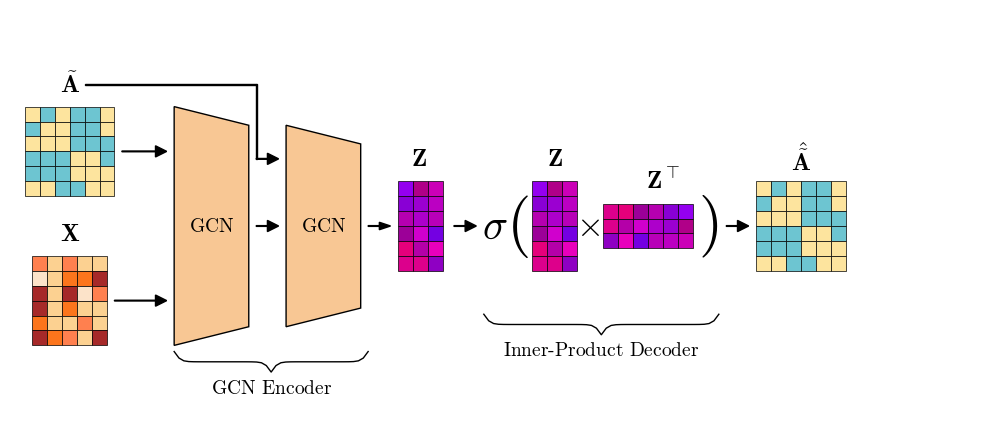

In [20]:
# gae
def draw_brace(ax, xspan, yy, text):
    """Draws an annotated upside-down brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1  # guaranteed uneven
    beta = 300./xax_span  # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy - (.05*y - .01)*yspan  # adjust vertical position and invert brace

    ax.autoscale(False)
    ax.plot(x, y, color='black', lw=1)

    ax.text((xmax+xmin)/2., yy - .08*yspan, text, ha='center', va='top', fontsize=14, math_fontfamily="cm")



fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(111, aspect="equal")

ax.set_xlim(-0.02, 1.28)
ax.set_ylim(.05, .6)

adj = np.array([
    [1, 0, 1, 0, 0, 1],
    [0, 1, 1, 0, 0, 1],
    [1, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1, 1],
    [1, 1, 0, 0, 1, 1]
])

cell_size = .02
adj_colors = {0: '#6DC5D1', 1: '#FDE49E'}
x_colors = [
    [0.99, 0.89, 0.79],
    [0.99, 0.82, 0.57],
    [0.99, 0.46, 0.11],
    [0.65, 0.16, 0.16],
    [1.0, 0.5, 0.31]
]
vcenter = (.5 + cell_size - .1) / 2 + .1

for i in range(len(adj)):
    for j in range(len(adj)):
        ax.add_patch(patches.Rectangle((cell_size * j, .45 - cell_size * i), cell_size, cell_size, edgecolor='black', facecolor=adj_colors[adj[i,j]], linewidth=.5))
plt.text(.06, .5, "$\\mathbf{\\tilde{A}}$", math_fontfamily="cm", fontsize=18, ha='center', va='center')
horizontal_adj_end = cell_size * len(adj)
space_between = .2 - horizontal_adj_end

for i in range(len(adj)):
    for j in range(5):
        ax.add_patch(patches.Rectangle((0.01 + cell_size * j, .25 - cell_size * i), cell_size, cell_size, edgecolor='black', facecolor=random.choice(x_colors), linewidth=.5))
plt.text(.06, .3, "$\\mathbf{X}$", math_fontfamily="cm", fontsize=18, ha='center', va='center')

ax.add_patch(patches.Polygon([[.2, .45 + cell_size], [.2, .15], [.3, .175], [.3, .425 + cell_size]], closed=True, edgecolor='black', facecolor='#F8C794', linewidth=1))
plt.text(.25, vcenter, "$\\text{GCN}$", fontsize=14, ha='center', va='center', math_fontfamily="cm")

ax.add_patch(patches.Polygon([[.35, .425 + cell_size], [.35, .175], [.45, .2], [.45, .4 + cell_size]], closed=True, edgecolor='black', facecolor='#F8C794', linewidth=1))
plt.text(.4, vcenter, "$\\text{GCN}$", fontsize=14, ha='center', va='center', math_fontfamily="cm")

encoded_colors = [
    [
        (0.6 + (random.random() - .3) / 2, 0, 0.6 + (random.random() - .3) / 2)
        for _ in range(3)
    ] 
    for _ in range(len(adj))
]

for i in range(len(adj)):
    for j in range(3):
        ax.add_patch(patches.Rectangle((.46 + space_between / 2 + cell_size * j, vcenter + cell_size * 2 - cell_size * i), cell_size, cell_size, edgecolor='black', facecolor=encoded_colors[i][j], linewidth=.5)) 
plt.text(.46 + space_between / 2 + 1.4 * cell_size, vcenter + cell_size * 2 + .05, "$\\mathbf{Z}$", math_fontfamily="cm", fontsize=18, ha='center', va='center')

plt.text(.49 + space_between + 3 * cell_size, vcenter, r"$\sigma$", math_fontfamily="cm", fontsize=30, ha='center', va='center')
plt.text(.52 + space_between + 3 * cell_size, vcenter, r"$($", math_fontfamily="cm", fontsize=45, ha='center', va='center')

u = .635
for i in range(len(adj)):
    for j in range(3):
        ax.add_patch(patches.Rectangle((.54 + space_between + (3 + j) * cell_size, vcenter + cell_size * 2 - cell_size * i), cell_size, cell_size, edgecolor='black', facecolor=encoded_colors[i][j], linewidth=.5)) 
        ax.add_patch(patches.Rectangle((u + space_between + (2 + (6 - i)) * cell_size, vcenter - .03 + cell_size * 2 - cell_size * j), cell_size, cell_size, edgecolor='black', facecolor=encoded_colors[i][j], linewidth=.5))
        
plt.text(.54 + space_between + 4.5 * cell_size, vcenter + cell_size * 2 + .05, "$\\mathbf{Z}$", math_fontfamily="cm", fontsize=18, ha='center', va='center')
plt.text(u + space_between + 7 * cell_size, vcenter + cell_size * 2 + .02, "$\\mathbf{Z}^{\\top}$", math_fontfamily="cm", fontsize=18, ha='center', va='center')
plt.text(.535 + space_between + 7 * cell_size, vcenter, r"$\times$", math_fontfamily="cm", fontsize=25, ha='center', va='center')
plt.text(u + space_between + 10 * cell_size, vcenter, r"$)$", math_fontfamily="cm", fontsize=45, ha='center', va='center')

for i in range(len(adj)):
    for j in range(len(adj)):
        ax.add_patch(patches.Rectangle((.9 + space_between + j * cell_size, vcenter + cell_size * 2 - cell_size * i), cell_size, cell_size, edgecolor='black', facecolor=adj_colors[adj[i,j]], linewidth=.5))
        
plt.text(.9 + space_between + 3 * cell_size, vcenter + cell_size * 2 + .05, "$\\mathbf{\\hat{\\tilde{A}}}$", math_fontfamily="cm", fontsize=18, ha='center', va='center')

ax.arrow(6 * cell_size, .15 + 3 * cell_size, .2 - 6.5 * cell_size, 0, head_width=.015, head_length=.015, fc='black', ec='black', length_includes_head=True)
ax.arrow(6.5 * cell_size, .45 - 2 * cell_size, .2 - 7 * cell_size, 0, head_width=.015, head_length=.015, fc='black', ec='black', length_includes_head=True)
ax.arrow(4 * cell_size, .5, .25 - cell_size, .0, head_width=.0, head_length=.0, fc='black', ec='black', length_includes_head=True)
ax.arrow(3 * cell_size + .25, .5, 0, -.1, head_width=.0, head_length=.0, fc='black', ec='black', length_includes_head=True)
ax.arrow(3 * cell_size + .25, .4, 0.03, 0, head_width=.015, head_length=.015, fc='black', ec='black', length_includes_head=True)
ax.arrow(.31, vcenter, .03, 0, head_width=.015, head_length=.015, fc='black', ec='black', length_includes_head=True)
ax.arrow(.46, vcenter, .03, 0, head_width=.01, head_length=.015, fc='black', ec='black', length_includes_head=True)
ax.arrow(.435 + space_between + 3 * cell_size, vcenter, .03, 0, head_width=.015, head_length=.015, fc='black', ec='black', length_includes_head=True)
ax.arrow(.86 + space_between, vcenter, .03, 0, head_width=.015, head_length=.015, fc='black', ec='black', length_includes_head=True)

draw_brace(ax, (.2, .46), .15, "$\\text{GCN Encoder}$")
draw_brace(ax, (.435 + space_between + 3 * cell_size + .04, .86 + space_between - .01), .2, "$\\text{Inner-Product Decoder}$")

plt.axis("off")
plt.tight_layout()
plt.savefig("figures/gae.png", transparent=True, dpi=300)

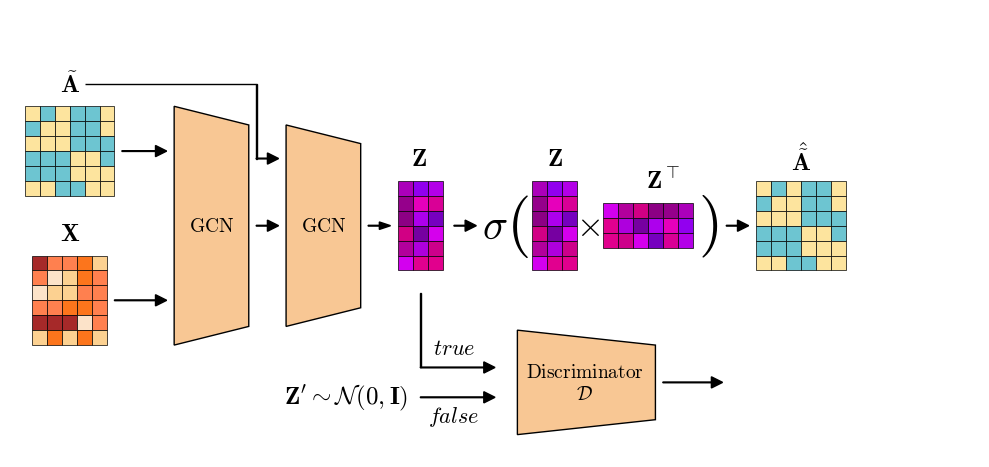

In [89]:
# arga
plt.rc('text', usetex=False)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

def draw_brace(ax, xspan, yy, text):
    """Draws an annotated upside-down brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin

    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1  # guaranteed uneven
    beta = 300./xax_span  # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:int(resolution/2)+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = yy - (.05*y - .01)*yspan  # adjust vertical position and invert brace

    ax.autoscale(False)
    ax.plot(x, y, color='black', lw=1)

    ax.text((xmax+xmin)/2., yy - .08*yspan, text, ha='center', va='top', fontsize=14, math_fontfamily="cm")



fig = plt.figure(figsize=(10, 5))

ax = fig.add_subplot(111, aspect="equal")

ax.set_xlim(-0.02, 1.28)
ax.set_ylim(0, .6)

adj = np.array([
    [1, 0, 1, 0, 0, 1],
    [0, 1, 1, 0, 0, 1],
    [1, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1, 1],
    [1, 1, 0, 0, 1, 1]
])

cell_size = .02
adj_colors = {0: '#6DC5D1', 1: '#FDE49E'}
x_colors = [
    [0.99, 0.89, 0.79],
    [0.99, 0.82, 0.57],
    [0.99, 0.46, 0.11],
    [0.65, 0.16, 0.16],
    [1.0, 0.5, 0.31]
]
vcenter = (.5 + cell_size - .1) / 2 + .1

for i in range(len(adj)):
    for j in range(len(adj)):
        ax.add_patch(patches.Rectangle((cell_size * j, .45 - cell_size * i), cell_size, cell_size, edgecolor='black', facecolor=adj_colors[adj[i,j]], linewidth=.5))
plt.text(.06, .5, "$\\mathbf{\\tilde{A}}$", math_fontfamily="cm", fontsize=18, ha='center', va='center')
horizontal_adj_end = cell_size * len(adj)
space_between = .2 - horizontal_adj_end

for i in range(len(adj)):
    for j in range(5):
        ax.add_patch(patches.Rectangle((0.01 + cell_size * j, .25 - cell_size * i), cell_size, cell_size, edgecolor='black', facecolor=random.choice(x_colors), linewidth=.5))
plt.text(.06, .3, "$\\mathbf{X}$", math_fontfamily="cm", fontsize=18, ha='center', va='center')

ax.add_patch(patches.Polygon([[.2, .45 + cell_size], [.2, .15], [.3, .175], [.3, .425 + cell_size]], closed=True, edgecolor='black', facecolor='#F8C794', linewidth=1))
plt.text(.25, vcenter, "$\\text{GCN}$", fontsize=14, ha='center', va='center', math_fontfamily="cm")

ax.add_patch(patches.Polygon([[.35, .425 + cell_size], [.35, .175], [.45, .2], [.45, .4 + cell_size]], closed=True, edgecolor='black', facecolor='#F8C794', linewidth=1))
plt.text(.4, vcenter, "$\\text{GCN}$", fontsize=14, ha='center', va='center', math_fontfamily="cm")

encoded_colors = [
    [
        (0.6 + (random.random() - .3) / 2, 0, 0.6 + (random.random() - .3) / 2)
        for _ in range(3)
    ] 
    for _ in range(len(adj))
]

for i in range(len(adj)):
    for j in range(3):
        ax.add_patch(patches.Rectangle((.46 + space_between / 2 + cell_size * j, vcenter + cell_size * 2 - cell_size * i), cell_size, cell_size, edgecolor='black', facecolor=encoded_colors[i][j], linewidth=.5)) 
plt.text(.46 + space_between / 2 + 1.4 * cell_size, vcenter + cell_size * 2 + .05, "$\\mathbf{Z}$", math_fontfamily="cm", fontsize=18, ha='center', va='center')

plt.text(.49 + space_between + 3 * cell_size, vcenter, r"$\sigma$", math_fontfamily="cm", fontsize=30, ha='center', va='center')
plt.text(.52 + space_between + 3 * cell_size, vcenter, r"$($", math_fontfamily="cm", fontsize=45, ha='center', va='center')

u = .635
for i in range(len(adj)):
    for j in range(3):
        ax.add_patch(patches.Rectangle((.54 + space_between + (3 + j) * cell_size, vcenter + cell_size * 2 - cell_size * i), cell_size, cell_size, edgecolor='black', facecolor=encoded_colors[i][j], linewidth=.5)) 
        ax.add_patch(patches.Rectangle((u + space_between + (2 + (6 - i)) * cell_size, vcenter - .03 + cell_size * 2 - cell_size * j), cell_size, cell_size, edgecolor='black', facecolor=encoded_colors[i][j], linewidth=.5))
        
plt.text(.54 + space_between + 4.5 * cell_size, vcenter + cell_size * 2 + .05, "$\\mathbf{Z}$", math_fontfamily="cm", fontsize=18, ha='center', va='center')
plt.text(u + space_between + 7 * cell_size, vcenter + cell_size * 2 + .02, "$\\mathbf{Z}^{\\top}$", math_fontfamily="cm", fontsize=18, ha='center', va='center')
plt.text(.535 + space_between + 7 * cell_size, vcenter, r"$\times$", math_fontfamily="cm", fontsize=25, ha='center', va='center')
plt.text(u + space_between + 10 * cell_size, vcenter, r"$)$", math_fontfamily="cm", fontsize=45, ha='center', va='center')

for i in range(len(adj)):
    for j in range(len(adj)):
        ax.add_patch(patches.Rectangle((.9 + space_between + j * cell_size, vcenter + cell_size * 2 - cell_size * i), cell_size, cell_size, edgecolor='black', facecolor=adj_colors[adj[i,j]], linewidth=.5))
        
plt.text(.9 + space_between + 3 * cell_size, vcenter + cell_size * 2 + .05, "$\\mathbf{\\hat{\\tilde{A}}}$", math_fontfamily="cm", fontsize=18, ha='center', va='center')

ax.arrow(6 * cell_size, .15 + 3 * cell_size, .2 - 6.5 * cell_size, 0, head_width=.015, head_length=.015, fc='black', ec='black', length_includes_head=True)
ax.arrow(6.5 * cell_size, .45 - 2 * cell_size, .2 - 7 * cell_size, 0, head_width=.015, head_length=.015, fc='black', ec='black', length_includes_head=True)
ax.arrow(4 * cell_size, .5, .25 - cell_size, .0, head_width=.0, head_length=.0, fc='black', ec='black', length_includes_head=True)
ax.arrow(3 * cell_size + .25, .5, 0, -.1, head_width=.0, head_length=.0, fc='black', ec='black', length_includes_head=True)
ax.arrow(3 * cell_size + .25, .4, 0.03, 0, head_width=.015, head_length=.015, fc='black', ec='black', length_includes_head=True)
ax.arrow(.31, vcenter, .03, 0, head_width=.015, head_length=.015, fc='black', ec='black', length_includes_head=True)
ax.arrow(.46, vcenter, .03, 0, head_width=.01, head_length=.015, fc='black', ec='black', length_includes_head=True)
ax.arrow(.435 + space_between + 3 * cell_size, vcenter, .03, 0, head_width=.015, head_length=.015, fc='black', ec='black', length_includes_head=True)
ax.arrow(.86 + space_between, vcenter, .03, 0, head_width=.015, head_length=.015, fc='black', ec='black', length_includes_head=True)

# draw_brace(ax, (.2, .46), .15, "$\\text{GCN Encoder}$")
# draw_brace(ax, (.435 + space_between + 3 * cell_size + .04, .86 + space_between - .01), .2, "$\\text{Inner-Product Decoder}$")

plt.text(.43, .08, r"$\mathbf{Z}'\sim \mathcal{N}(\mathbf{0},\mathbf{I})$", fontsize=18, ha='center', va='center', math_fontfamily="cm")
plt.arrow(.46 + space_between / 2 + 1.5 * cell_size, .08, .1, 0, head_width=.015, head_length=.015, fc='black', ec='black', length_includes_head=True)

x_d = .46 + space_between / 2 + 1.5 * cell_size
y_d = vcenter - cell_size * 7 + .05
plt.arrow(x_d, y_d, .0, -0.1, head_width=.0, head_length=.0, fc='black', ec='black', length_includes_head=True)
plt.arrow(x_d, y_d - 0.1, .1, 0, head_width=.015, head_length=.015, fc='black', ec='black', length_includes_head=True)

plt.text(x_d + .045, y_d - 0.075, r"$true$", fontsize=16, ha='center', va='center', math_fontfamily="cm")

plt.text(x_d + .045, y_d - 0.165, r"$false$", fontsize=16, ha='center', va='center', math_fontfamily="cm")
# discriminator
ax.add_patch(patches.Polygon([[x_d + .13, y_d - .05], [x_d + .13, .03], [x_d + .315, .05], [x_d + .315, y_d - .07]], closed=True, edgecolor='black', facecolor='#F8C794', linewidth=1))
plt.text(x_d + .22, y_d - .12, "$\\text{Discriminator}$\n$\\mathcal{D}$", fontsize=14, ha='center', va='center', math_fontfamily="cm")

ax.arrow(x_d + .325, y_d - .12, .08, 0, head_width=.015, head_length=.015, fc='black', ec='black', length_includes_head=True)
plt.text(x_d + .425, y_d - .12, r"", fontsize=14, ha='center', va='center', math_fontfamily="cm")

plt.axis("off")
plt.tight_layout()
plt.savefig("figures/arga.png", transparent=True, dpi=300)